In [1]:
# -*- coding: utf-8 -*-
#  Copyright 2024 Till Leissner
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by: Till Leissner (University of Southern Denmark)
#   Edited by: 
#
#   We acknowledge support from the ESS Lighthouse on Hard Materials in 3D, SOLID, funded by the Danish Agency for Science and Higher Education (grant No. 8144-00002B).

In [2]:
### General imports 
import numpy as np
import os
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

### Import all CIL components needed
import cil
from cil.io import TIFFWriter, TIFFStackReader


### Import custom helper functions
import bruker2cil as bc

# This notebook has been tested with CIL version 24.0.0
cil.__version__

'24.0.0'

# Introduction

This notebook compares the reconstruction results obtained with CIL using the showcase notebook *bruker2cil.ipynb* with the results from the proprietar Bruker software NRecon, version 1.7.5.0. You should look at  the *bruker2cil.ipynb* notebook before this one.  

The data sets are available a compressed zip archives on [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.12205501.svg)](https://doi.org/10.5281/zenodo.12205501). 

To run this notebook, we recommend in your `./samples/01-switch-small` directory, downloading and unpacking `001_Rec_NRecon.zip` e.g. using `wget https://zenodo.org/records/12205501/files/001_Rec_NRecon.zip` and running `unzip 001_Rec_NRecon.zip`.

# Load data sets

## CIL reconstructed dataset

In [3]:
# 001_Rec_NRecon.zip

datadir = './samples/01-switch-small' # Path to the dataset
dataset_prefix = '001_'
subfolder = dataset_prefix+'Rec'
filelist = bc.get_filelist(os.path.join(datadir,subfolder),'001__idx_',num_digits=4,extension='tiff')
reader = TIFFStackReader(file_name=filelist)
recon_cil = reader.read()
recon_cil = recon_cil[77:-85,:,:]
print(recon_cil.shape)

# Min-Max scaling
background_val = np.min(recon_cil[:8, 0,0])
max_val = np.max(recon_cil)
recon_cil = (recon_cil - background_val) / (max_val- background_val)

(324, 164, 164)


## Bruker Nrecon reconstructed dataset

In [4]:
# 001_Rec_CIL.zip

datadir = './samples/01-switch-small' # Path to the dataset
dataset_prefix = '001_'
subfolder = dataset_prefix+'Rec_NRecon'
filelist = bc.get_filelist(os.path.join(datadir,subfolder),'001_Rec_',num_digits=4,extension='tif')
reader = TIFFStackReader(file_name=filelist)
recon_nrecon = reader.read()
print(recon_nrecon.shape)
recon_nrecon=np.flip(recon_nrecon,axis=0)
recon_nrecon=np.flip(recon_nrecon,axis=1)

# Min-Max scaling
min_val = np.min(recon_nrecon)
max_val = np.max(recon_nrecon)
recon_nrecon = (recon_nrecon - min_val) / (max_val - min_val)

(324, 164, 164)


## Plot both data sets

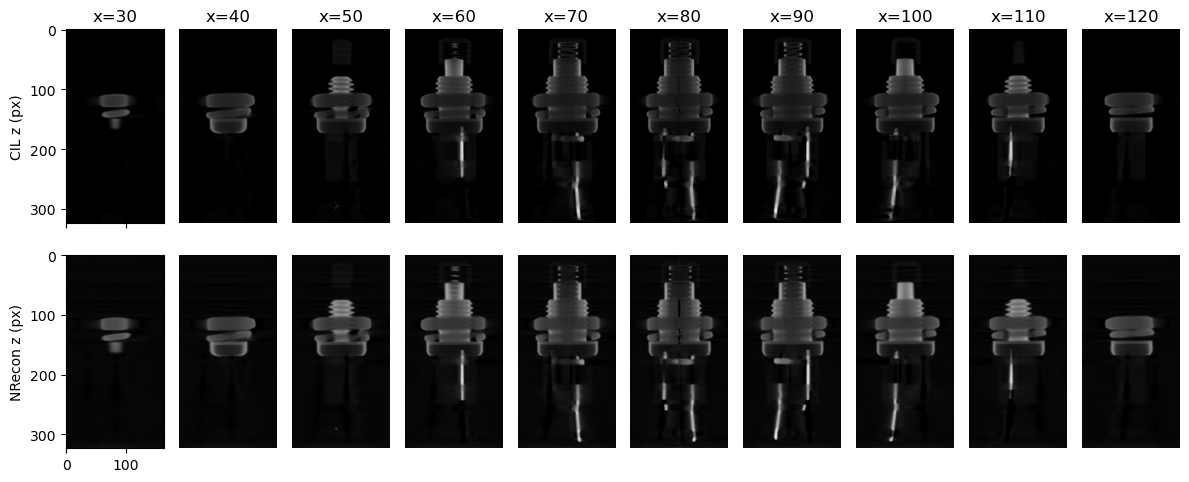

In [5]:
cmap='grey'
rows, cols = 2,10
fig, axes = plt.subplots(rows, cols, figsize=(12, 5), layout='tight', sharey=True, sharex=True)
for row in range(rows):
    for col in range(cols):  
        slice=30+col*10
        axes[0,col].imshow(recon_cil[:,:,slice],cmap=cmap, vmin=0, vmax=1)
        axes[0,col].set_title(f'x={slice}')
        
        if col==0:
            axes[0,col].set_ylabel('CIL z (px)')
            axes[1,col].set_ylabel('NRecon z (px)')
            #axes[0,col].set_xlabel('y (px)')
        else:
            axes[0,col].axis('off')
            axes[1,col].axis('off')

        axes[1,col].imshow(recon_nrecon[:,:,slice],cmap=cmap, vmin=0, vmax=1)

fig.show();

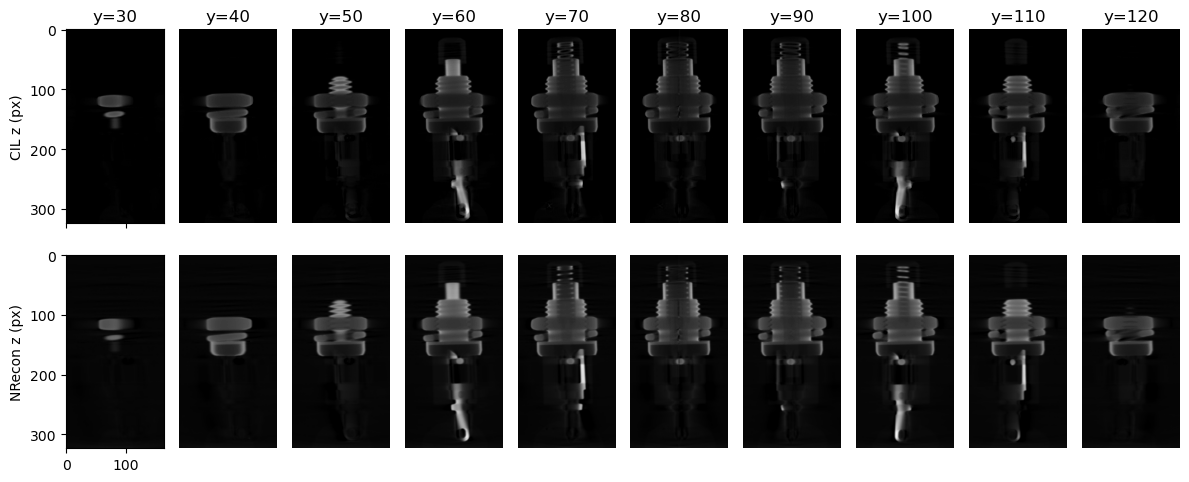

In [6]:
cmap='grey'
rows, cols = 2,10
fig, axes = plt.subplots(rows, cols, figsize=(12, 5), layout='tight', sharey=True, sharex=True)
for row in range(rows):
    for col in range(cols):  
        slice=30+col*10
        axes[0,col].imshow(recon_cil[:,slice,:],cmap=cmap, vmin=0, vmax=1)
        axes[0,col].set_title(f'y={slice}')
        
        if col==0:
            axes[0,col].set_ylabel('CIL z (px)')
            axes[1,col].set_ylabel('NRecon z (px)')
            #axes[0,col].set_xlabel('y (px)')
        else:
            axes[0,col].axis('off')
            axes[1,col].axis('off')

        axes[1,col].imshow(recon_nrecon[:,slice,:],cmap=cmap, vmin=0, vmax=1)

fig.show();

In [7]:
recon_nrecon[:,slice,:].min()


0.0

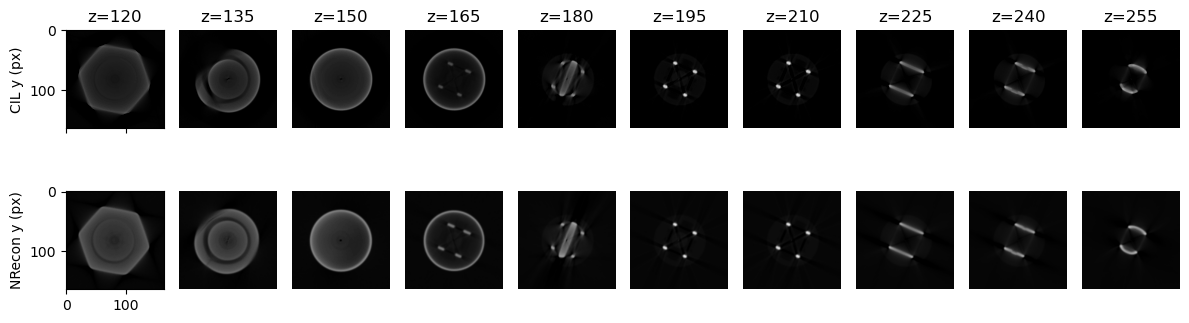

In [8]:
cmap='grey'
rows, cols = 2,10
fig, axes = plt.subplots(rows, cols, figsize=(12, 5), layout='tight', sharey=True, sharex=True)
for row in range(rows):
    for col in range(cols):  
        slice=120+col*15
        axes[0,col].imshow(recon_cil[slice,:,:],cmap=cmap, vmin=0, vmax=1)
        axes[0,col].set_title(f'z={slice}')
        
        if col==0:
            axes[0,col].set_ylabel('CIL y (px)')
            axes[1,col].set_ylabel('NRecon y (px)')
            #axes[0,col].set_xlabel('y (px)')
        else:
            axes[0,col].axis('off')
            axes[1,col].axis('off')

        axes[1,col].imshow(recon_nrecon[slice,:,:],cmap=cmap, vmin=0, vmax=1)

fig.show();

### Interactive plotting

In [9]:
cmap = 'grey'

def plot_results(recon1,recon2,x,y,z):
    fig, axs = plt.subplots(2, 3)
    axs[0,0].imshow(recon1[:,:,x],cmap=cmap, vmin=0, vmax=1)
    axs[1,0].imshow(recon2[:,:,x],cmap=cmap)

    axs[0,1].imshow(recon1[:,y,:],cmap=cmap, vmin=0, vmax=1)
    axs[1,1].imshow(recon2[:,y,:],cmap=cmap, vmin=0, vmax=1)

    axs[0,2].imshow(recon1[z,:,:],cmap=cmap, vmin=0, vmax=1)
    axs[1,2].imshow(recon2[z,:,:],cmap=cmap, vmin=0, vmax=1)
    fig.set_size_inches((12,8))
    fig.show

#Upper row: CIL 24.0
#Lower row: NRecon 1.7.5.0

interact(plot_results,
         recon1 = widgets.fixed(recon_cil), \
         recon2 = widgets.fixed(recon_nrecon), \
         x = widgets.IntSlider(value=81, min=0, max=163, step=1), \
         y = widgets.IntSlider(value=81, min=0, max=163, step=1), \
         z = widgets.IntSlider(value=161, min=0, max=323, step=1))

interactive(children=(IntSlider(value=81, description='x', max=163), IntSlider(value=81, description='y', max=…

<function __main__.plot_results(recon1, recon2, x, y, z)>